In [51]:
# I will be completely honest
# I did use your guide and chatgpt for the training dataset and visulization plot. I did mention where I used gpt
# for some reason it was not letting me asses my model for the mean, absolute error, ... because its a classifacation report
# but in my proposal you told me it should belong in a linear regression
# I hope you can accept my honesty.

In [52]:
print ('hamid muktaky')
print('23925101')

hamid muktaky
23925101


In [7]:

import pandas as pd  # these are the list of libaries to performa calculations, visulizations, machine learning and etc
import matplotlib as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pickle


In [8]:
covid = pd.read_csv('country_wise_latest.csv') # reads the csv file into a dataframe

In [9]:
covid.head() #prints out some of the data

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [10]:
covid.shape

(187, 15)

In [11]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

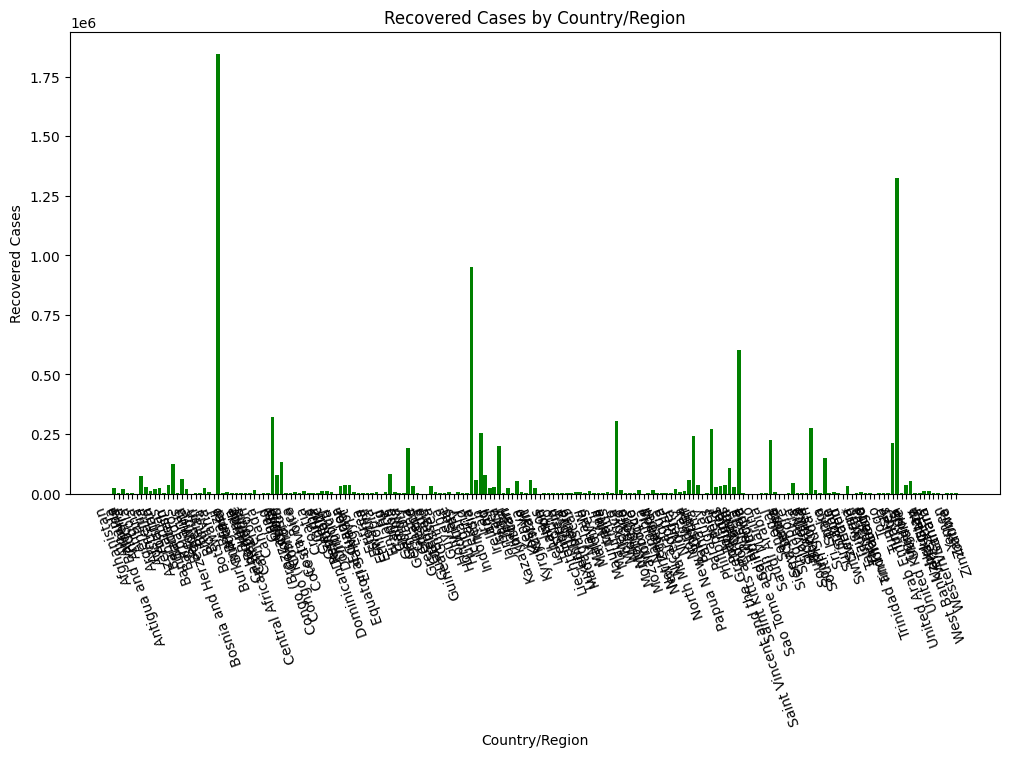

In [30]:
plt.figure(figsize=(12, 6))  # Adjust the figure size to make it wider
plt.bar(covid['Country/Region'], covid['Recovered'], color='green')
plt.xlabel('Country/Region')
plt.ylabel('Recovered Cases')
plt.xticks(rotation=110)
plt.show()
# I did use chatgpt for this part to make the visualization


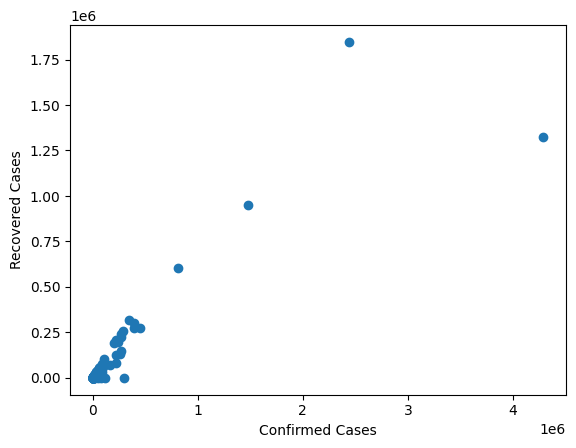

In [31]:
plt.scatter(covid['Confirmed'], covid['Recovered'])
plt.xlabel('Confirmed Cases')
plt.ylabel('Recovered Cases')
plt.show()
# I did use chatgpt for this part to make the visualization

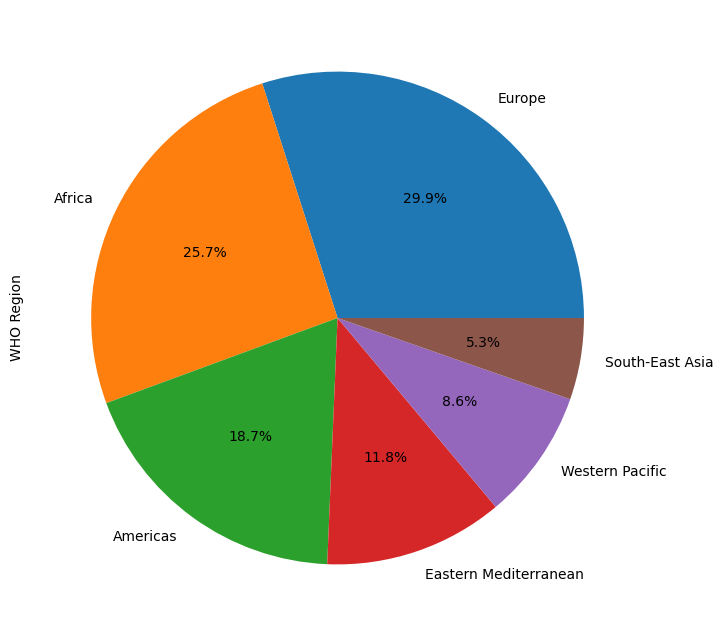

In [32]:
plt.figure(figsize=(8, 8))
covid['WHO Region'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()
# I did use chatgpt for this part to make the visualization

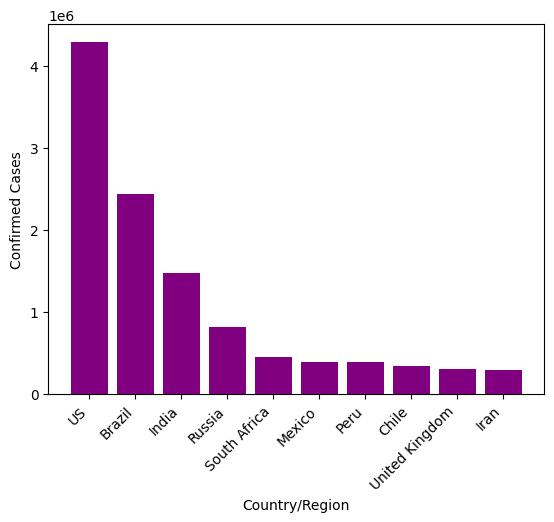

In [33]:
top_countries_confirmed = covid.sort_values(by='Confirmed', ascending=False).head(10)
plt.bar(top_countries_confirmed['Country/Region'], top_countries_confirmed['Confirmed'], color='purple')
plt.xlabel('Country/Region')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=45, ha='right')
plt.show()
# I did use chatgpt for this part to make the visualization

In [35]:
#Note the use of .vales and
# these are x values that will extracted from the dataset
X = covid[['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered']].values

In [37]:
y = covid[['Deaths / 100 Cases']].values # the concetrated y value that I am focusing on

In [53]:
from sklearn.model_selection import train_test_split #this will train the dataset and split them

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [39]:
from sklearn.preprocessing import StandardScaler # this will allow me to perform standarization

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [45]:
from sklearn.neighbors import KNeighborsClassifier  #i got these codes from chatgpt, because I kept getting error, and didn't know where to place the variables, and other in the correct place
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

features = ['Confirmed', 'Deaths', 'Recovered']
X = covid[features]
y = covid['WHO Region']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and fit the KNeighborsClassifier model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

                       precision    recall  f1-score   support

               Africa       0.29      0.38      0.32        16
             Americas       0.19      0.57      0.29         7
Eastern Mediterranean       0.40      0.40      0.40         5
               Europe       0.30      0.12      0.18        24
      South-East Asia       0.00      0.00      0.00         2
      Western Pacific       0.00      0.00      0.00         3

             accuracy                           0.26        57
            macro avg       0.20      0.25      0.20        57
         weighted avg       0.26      0.26      0.24        57



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# I got this code from chatgpt, i tried your code, but kept getting error, this should be a linear regression(you said in proposal), but shows up as classsification.

# Calculates and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Prints confusion matrix and classification report
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

print('\nClassification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.2631578947368421
Confusion Matrix:
[[ 6  5  0  5  0  0]
 [ 2  4  0  1  0  0]
 [ 2  0  2  1  0  0]
 [10  8  3  3  0  0]
 [ 1  1  0  0  0  0]
 [ 0  3  0  0  0  0]]

Classification Report:
                       precision    recall  f1-score   support

               Africa       0.29      0.38      0.32        16
             Americas       0.19      0.57      0.29         7
Eastern Mediterranean       0.40      0.40      0.40         5
               Europe       0.30      0.12      0.18        24
      South-East Asia       0.00      0.00      0.00         2
      Western Pacific       0.00      0.00      0.00         3

             accuracy                           0.26        57
            macro avg       0.20      0.25      0.20        57
         weighted avg       0.26      0.26      0.24        57



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
